c:\Users\amant\Documents\aaa-COLLEGE\aaa-semester 5\deep learning lab\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.79
Precision: 0.85
Sensitivity (Recall): 0.61
Specificity: 0.92


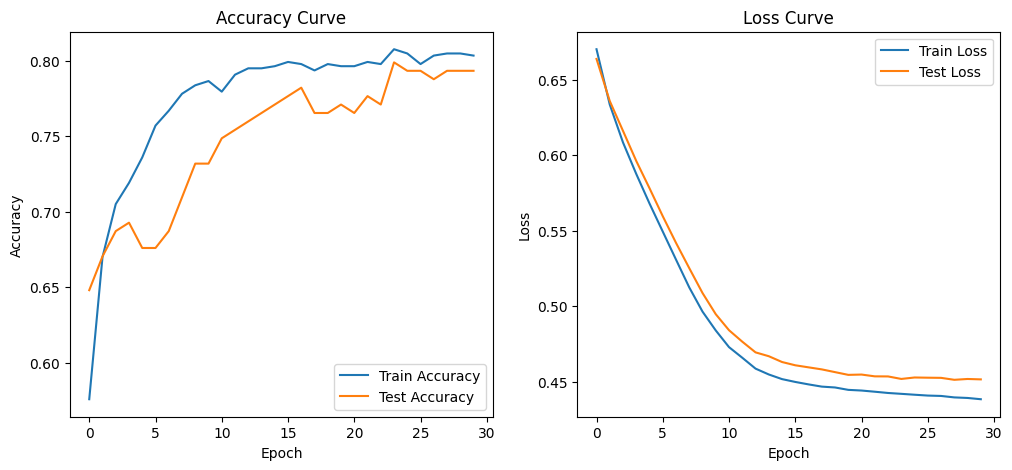

In [1]:
# Basic Neural Network for Classification (Titanic Dataset)
# This script implements a simple neural network for a classification task using TensorFlow and the Titanic dataset from Kaggle.

# Step 1: Define problem and collect data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load Titanic dataset (make sure 'train.csv' is in the same folder)
df = pd.read_csv('train.csv')

# Step 2: Data preprocessing
# Encode 'Sex' column to numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']].fillna(0).values
y = df['Survived'].values
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Design neural network model
model = keras.Sequential([
	keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
	keras.layers.Dense(8, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Feed data to neural network model & Step 5: Training and testing
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# Test the model
guessed_survival = model.predict(X_test)
guessed_labels = np.round(guessed_survival).flatten()

# Step 6: Performance analysis (Accuracy, Specificity, Sensitivity, Precision)
accuracy = accuracy_score(y_test, guessed_labels)
precision = precision_score(y_test, guessed_labels)
sensitivity = recall_score(y_test, guessed_labels)
cm = confusion_matrix(y_test, guessed_labels)
tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0,0,0,0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

# Step 7: Plot accuracy and loss curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()